<a href="https://colab.research.google.com/github/iwandepe/fp-kk-mlp-bpso/blob/main/mlp-bpso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT KECERDASAN KOMPUTATIONAL

**Disusun oleh:**
1. Mohammad Faderik Izzul Haq (05111940000023)
2. Allam Taju Sarof (05111940000053)
3. Iwan Dwi Prakoso (05111940000229)

# Preprocessing

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from random import random, randint
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 

drive.mount('/content/drive')

df_train_original = pd.read_csv('/content/drive/MyDrive/KK-finject/dreaddit-train.csv')
df_test_original = pd.read_csv('/content/drive/MyDrive/KK-finject/dreaddit-test.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

In [ ]:
df_train = df_train_original.copy()
df_test = df_test_original.copy()

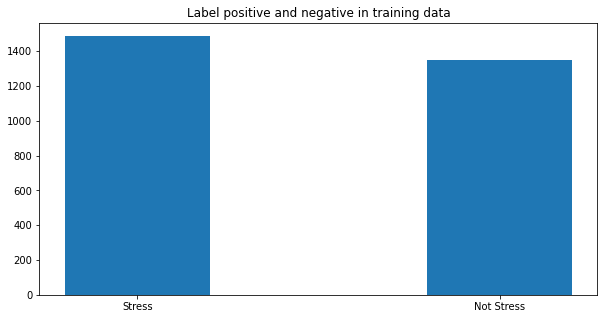

In [ ]:
stress_count = df_train[df_train['label'] == 1].count()['label']
not_stress_count = df_train[df_train['label'] == 0].count()['label']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(['Stress', 'Not Stress'], [stress_count, not_stress_count], width = 0.4)
 
plt.title("Label positive and negative in training data")
plt.show()



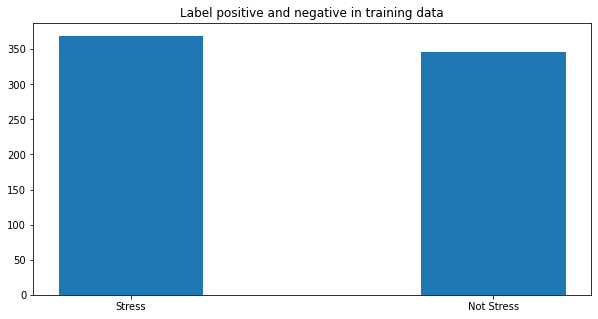

In [ ]:
stress_count = df_test[df_test['label'] == 1].count()['label']
not_stress_count = df_test[df_test['label'] == 0].count()['label']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(['Stress', 'Not Stress'], [stress_count, not_stress_count], width = 0.4)
 
plt.title("Label positive and negative in training data")
plt.show()

In [ ]:
list(df_train)

['subreddit',
 'post_id',
 'sentence_range',
 'text',
 'id',
 'label',
 'confidence',
 'social_timestamp',
 'social_karma',
 'syntax_ari',
 'lex_liwc_WC',
 'lex_liwc_Analytic',
 'lex_liwc_Clout',
 'lex_liwc_Authentic',
 'lex_liwc_Tone',
 'lex_liwc_WPS',
 'lex_liwc_Sixltr',
 'lex_liwc_Dic',
 'lex_liwc_function',
 'lex_liwc_pronoun',
 'lex_liwc_ppron',
 'lex_liwc_i',
 'lex_liwc_we',
 'lex_liwc_you',
 'lex_liwc_shehe',
 'lex_liwc_they',
 'lex_liwc_ipron',
 'lex_liwc_article',
 'lex_liwc_prep',
 'lex_liwc_auxverb',
 'lex_liwc_adverb',
 'lex_liwc_conj',
 'lex_liwc_negate',
 'lex_liwc_verb',
 'lex_liwc_adj',
 'lex_liwc_compare',
 'lex_liwc_interrog',
 'lex_liwc_number',
 'lex_liwc_quant',
 'lex_liwc_affect',
 'lex_liwc_posemo',
 'lex_liwc_negemo',
 'lex_liwc_anx',
 'lex_liwc_anger',
 'lex_liwc_sad',
 'lex_liwc_social',
 'lex_liwc_family',
 'lex_liwc_friend',
 'lex_liwc_female',
 'lex_liwc_male',
 'lex_liwc_cogproc',
 'lex_liwc_insight',
 'lex_liwc_cause',
 'lex_liwc_discrep',
 'lex_liwc_tent

In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
df_train.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [ ]:
print(df_train.shape)

(2838, 116)


In [ ]:
print(df_test.shape)

(715, 116)


In [ ]:
df_train.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [ ]:
df_train.subreddit.value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [ ]:
df_train.corr().abs()['label'].sort_values(ascending = False)[:30]

label                       1.000000
lex_liwc_Tone               0.436005
lex_liwc_Clout              0.403804
lex_liwc_i                  0.400440
lex_liwc_negemo             0.387979
sentiment                   0.305157
lex_dal_min_pleasantness    0.297439
lex_liwc_Authentic          0.275282
lex_liwc_posemo             0.270672
lex_liwc_anx                0.260146
lex_liwc_social             0.250052
lex_liwc_Analytic           0.247933
lex_liwc_Dic                0.241536
lex_liwc_function           0.236932
lex_liwc_anger              0.218990
lex_liwc_you                0.210543
lex_liwc_feel               0.198048
lex_liwc_sad                0.196268
lex_liwc_Apostro            0.187498
lex_liwc_ppron              0.187372
lex_liwc_focuspresent       0.186910
lex_liwc_negate             0.186769
lex_liwc_pronoun            0.185846
lex_liwc_risk               0.178752
lex_liwc_affiliation        0.177702
lex_liwc_adverb             0.176623
lex_liwc_article            0.168128
l

## Data Preparation

In [ ]:
df_train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,...,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,...,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,...,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,...,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,30.40,23.44,16.12,0.37,0.37,6.59,0.0,6.96,3.30,9.16,8.79,6.59,9.89,3.66,20.88,3.66,1.83,1.10,0.00,1.10,8.79,...,1.83,3.30,6.23,0.73,0.37,0.37,0.00,0.00,0.0,2.56,0.00,0.73,0.73,0.0,0.0,12.09,2.56,7.33,0.00,0.00,0.0,0.0,0.0,1.47,0.00,0.73,0.00,3.0000,2.6364,3.0,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,89,32.22,28.71,84.01,1.00,17.80,31.46,88.76,52.81,15.73,11.24,7.87,0.00,0.00,3.37,0.0,4.49,4.49,8.99,13.48,4.49,4.49,2.25,13.48,4.49,2.25,1.12,1.12,1.12,7.87,...,2.25,2.25,10.11,1.12,0.00,2.25,1.12,0.00,0.0,1.12,0.00,0.00,0.00,0.0,0.0,16.85,5.62,6.74,1.12,0.00,0.0,0.0,0.0,0.00,1.12,2.25,0.00,3.0000,3.0000,3.0,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


### One Hot Encoder

In [ ]:
onehot_train = pd.get_dummies(df_train['subreddit'])
onehot_test = pd.get_dummies(df_test['subreddit'])

onehot_train['id'] = df_train['id']
onehot_test['id'] = df_test['id']

df_train = pd.merge(onehot_train, df_train)
df_test = pd.merge(onehot_test, df_test)

df_train = df_train.drop(['subreddit'], axis = 1)
df_test = df_test.drop(['subreddit'], axis = 1)

df_train.columns

Index(['almosthomeless', 'anxiety', 'assistance', 'domesticviolence',
       'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress',
       'survivorsofabuse',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=125)

### TF-IDF Tokenizer

In [ ]:
df_train_text = df_train['text']
df_test_text = df_test['text']

In [ ]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=1.0, max_features=300)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(df_train_text)
tfidf_test=tfidf_vectorizer.transform(df_test_text)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names())
for column in (list(tfidf_train_df)):
  if column in stop_words:
    tfidf_train_df = tfidf_train_df.drop(columns=[column])

display(tfidf_train_df.head())

tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names())
for column in (list(tfidf_test_df)):
  if column in stop_words:
    tfidf_test_df = tfidf_test_df.drop(columns=[column])

display(tfidf_test_df.head())

,able,abuse,actually,advice,ago,almost,also,always,another,anxiety,anymore,anyone,anything,around,ask,asked,away,back,bad,best,bit,boyfriend,call,came,car,care,come,could,couple,dad,day,days,depression,done,dr,else,end,enough,etc,even,...,sure,take,talk,talking,tell,thank,therapy,thing,things,think,thinking,though,thought,time,times,tl,today,together,told,tried,try,trying,two,url,us,use,used,want,wanted,way,week,weeks,well,went,without,work,working,would,year,years
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.130666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.116021,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141890,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142389,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.154825,0.266904,0.0,0.0,0.0,0.163623,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.162948,0.102111,0.000000,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.197359,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.104871,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.000000,0.085354,0.0,0.0,0.0,0.000000,0.0,0.098171,0.077086,0.077015,0.000000,0.0,0.0,0.061816,0.000000,0.0,0.0,0.0,0.083336,0.0,0.0,0.090082,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065309,0.084859,0.000000
3,0.0,0.0,0.06225,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.055146,0.0,0.0,0.186379,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.082432,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.059115,0.092837,0.046375,0.063149,0.0,0.0,0.074447,0.056695,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.084846,0.0,0.151217,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222794,0.24248,0.153456,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.190251,0.171083


,able,abuse,actually,advice,ago,almost,also,always,another,anxiety,anymore,anyone,anything,around,ask,asked,away,back,bad,best,bit,boyfriend,call,came,car,care,come,could,couple,dad,day,days,depression,done,dr,else,end,enough,etc,even,...,sure,take,talk,talking,tell,thank,therapy,thing,things,think,thinking,though,thought,time,times,tl,today,together,told,tried,try,trying,two,url,us,use,used,want,wanted,way,week,weeks,well,went,without,work,working,would,year,years
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.151073,0.0,0.0,0.353666,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.124695,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.252282,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.183083,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.106977,0.000000,0.09047,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.125404,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.11174,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.07973,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.097073,0.0,0.0,0.0,0.113204,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.114946,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.181311,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.131357,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.274654,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110124,0.0,0.000000,0.185665,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.190072,0.125507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.116347,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.174585,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.211029,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.206227,0.0,0.0,0.0,0.000000,0.00000,...,0.202546,0.174585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.210197,0.000000,0.0,0.170457,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.144101,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.267169,0.0,0.0


In [ ]:
X_train = tfidf_train_df
X_test = tfidf_test_df

y_train = df_train['label']
y_test = df_test['label'] 

In [ ]:
X_train.head()

,able,abuse,actually,advice,ago,almost,also,always,another,anxiety,anymore,anyone,anything,around,ask,asked,away,back,bad,best,bit,boyfriend,call,came,car,care,come,could,couple,dad,day,days,depression,done,dr,else,end,enough,etc,even,...,sure,take,talk,talking,tell,thank,therapy,thing,things,think,thinking,though,thought,time,times,tl,today,together,told,tried,try,trying,two,url,us,use,used,want,wanted,way,week,weeks,well,went,without,work,working,would,year,years
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.130666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.116021,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141890,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142389,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.154825,0.266904,0.0,0.0,0.0,0.163623,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.162948,0.102111,0.000000,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.197359,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.104871,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.000000,0.085354,0.0,0.0,0.0,0.000000,0.0,0.098171,0.077086,0.077015,0.000000,0.0,0.0,0.061816,0.000000,0.0,0.0,0.0,0.083336,0.0,0.0,0.090082,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065309,0.084859,0.000000
3,0.0,0.0,0.06225,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.055146,0.0,0.0,0.186379,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.082432,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.059115,0.092837,0.046375,0.063149,0.0,0.0,0.074447,0.056695,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.084846,0.0,0.151217,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222794,0.24248,0.153456,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.190251,0.171083


In [ ]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
X_train = X_train.rename(columns={"anxiety":"anxiety_word", "ptsd": "ptsd_text"})
X_test = X_test.rename(columns={"anxiety":"anxiety_word", "ptsd": "ptsd_text"})

In [ ]:
columns = ['almosthomeless',
  'anxiety',
  'assistance',
  'domesticviolence',
  'food_pantry',
  'homeless',
  'ptsd',
  'relationships',
  'stress',
  'survivorsofabuse',

  'social_timestamp',
  'social_karma',
  'syntax_ari',
  'confidence',
  'social_upvote_ratio',
  'social_num_comments',
  'syntax_fk_grade',

  'sentiment']

X_train = X_train.join(df_train[columns])
X_test = X_test.join(df_test[columns])


In [ ]:
X_train.shape

(2838, 207)

In [ ]:
X_train.head()

,able,abuse,actually,advice,ago,almost,also,always,another,anxiety_word,anymore,anyone,anything,around,ask,asked,away,back,bad,best,bit,boyfriend,call,came,car,care,come,could,couple,dad,day,days,depression,done,dr,else,end,enough,etc,even,...,told,tried,try,trying,two,url,us,use,used,want,wanted,way,week,weeks,well,went,without,work,working,would,year,years,almosthomeless,anxiety,assistance,domesticviolence,food_pantry,homeless,ptsd,relationships,stress,survivorsofabuse,social_timestamp,social_karma,syntax_ari,confidence,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.130666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.116021,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141890,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,1521614353,5,1.806818,0.8,0.86,1,3.253573,-0.002742
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142389,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.162948,0.102111,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,1527009817,4,9.429737,1.0,0.65,2,8.828316,0.292857
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.197359,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.104871,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.083336,0.0,0.0,0.090082,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065309,0.084859,0.000000,0,0,0,0,0,0,1,0,0,0,1535935605,2,7.769821,0.8,0.67,0,7.841667,0.011894
3,0.0,0.0,0.06225,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.055146,0.0,0.0,0.186379,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.082432,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.084846,0.0,0.151217,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,1516429555,0,2.667798,0.6,0.50,5,4.104027,0.141671
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222794,0.24248,0.153456,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.190251,0.171083,0,0,0,0,0,0,0,0,0,1,1539809005,24,7.554238,0.8,1.00,1,7.910952,-0.204167


# Default MLP

## Modelling

In [ ]:
model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100), max_iter=2000)
mlp = model.fit(X_train.values, y_train.values)

In [ ]:
print('Data train ', model.score(X_train.values, y_train.values))
print('Data test ', model.score(X_test.values, y_test.values))

Data train  0.5243128964059197
Data test  0.5160839160839161


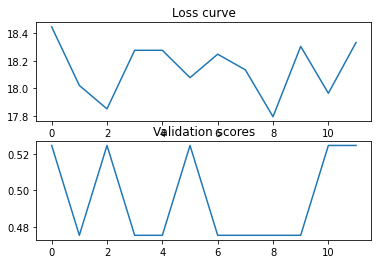

In [ ]:
plt.subplot(211)
plt.title('Loss curve')
plt.plot(mlp.loss_curve_)
plt.subplot(212)
plt.title('Validation scores')
plt.plot(mlp.validation_scores_)

## Testing

In [ ]:
# evaluate a given model using cross-validation
def cross_validate(model, x, y):
	scores = cross_val_score(model, x, y)
	return scores.mean()

In [ ]:
prediction = model.predict(X_train.values)
scoreF1 = f1_score(y_train, prediction)
scoreAccuracy = accuracy_score(y_train, prediction)
scorePrecision = precision_score(y_train, prediction)
scoreRecall = recall_score(y_train, prediction)
scoreROC = roc_auc_score(y_train, prediction)

print('Result for training')
print('MLP F1 Score %.2f' % scoreF1)
print('MLP Accuracy Score %.2f' % scoreAccuracy)
print('MLP Precision Score %.2f' % scorePrecision)
print('MLP Recall Score %.2f' % scoreRecall)
print('MLP ROC AUC Score %.2f' % scoreROC)

Result for training
MLP F1 Score 0.69
MLP Accuracy Score 0.52
MLP Precision Score 0.52
MLP Recall Score 1.00
MLP ROC AUC Score 0.50


In [ ]:
prediction = model.predict(X_test)
scoreF1 = f1_score(y_test, prediction)
scoreAccuracy = accuracy_score(y_test, prediction)
scorePrecision = precision_score(y_test, prediction)
scoreRecall = recall_score(y_test, prediction)
scoreROC = roc_auc_score(y_test, prediction)

print('Result for testing')
print('MLP F1 Score %.2f' % scoreF1)
print('MLP Accuracy Score %.2f' % scoreAccuracy)
print('MLP Precision Score %.2f' % scorePrecision)
print('MLP Recall Score %.2f' % scoreRecall)
print('MLP ROC AUC Score %.2f' % scoreROC)

Result for testing
MLP F1 Score 0.68
MLP Accuracy Score 0.52
MLP Precision Score 0.52
MLP Recall Score 1.00
MLP ROC AUC Score 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# MLP with BPSO

## Feature Selection

In [ ]:
class BPSO:
    def __init__(self, f_count, df, df_test):
        
        #feature count 
        self.f_count  = f_count
        # Actual Positions  radmon prob
        self.pos_act  = []
        # Position prob > 0.5 set as 1 or 0  
        self.position = []
        # Velocity random between -1 and 1 
        self.velocity = []
        # best position 
        self.pos_best = []
        # Y actual 
        self.y_actual = []
        # Y test predicted 
        self.y_predict= []
        # best fit accuracy, Recall, Precision
        self.fit_best = (-1, -1, -1)
        # accuracy , recall, precsion 
        self.fitness  = (-1, -1, -1)
        # data 
        self.df       = df.copy()

        self.model    = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100), max_iter=2000)

        self.df_test  = df_test.copy()
        
        self.initialize(f_count)
    
    # initialize 
    def initialize(self, f_count):
        self.f_count = f_count
        self.initalize_position(f_count)
        self.initialize_velocity(f_count)
    
    def set_data(self,data):
        self.df = data.copy()
        # print(self.df.head())
        
    #Initialize the positions > 0.5  is set as 1
    def initalize_position(self,f_count):
        self.pos_act = np.random.uniform(low=0, high=1, size=f_count).tolist()
        self.position = [1 if po > 0.5 else 0  for po in self.pos_act]
        
    def initialize_velocity(self, f_count):
        self.velocity = np.random.uniform(low=-1, high=1, size=f_count).tolist()
        
    def drop_columns(self, X):
      i = 0
      X_1 = X.copy()
      for index, value in enumerate(self.position):
          if value == 0 :
              X_1 = X_1.drop(X_1.columns[i], axis = 1)
          else:
              i = i+1
      return X_1
    
    def classification_accuracy(self,y_actual, y_hat):
        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for i in range(len(y_hat)): 
            if y_actual[i]==y_hat[i]==1:
                TP += 1
            if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
                FP += 1
            if y_actual[i]==y_hat[i]==0:
                TN += 1
            if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
                FN += 1
        
        
        class_acc = float((TP+TN)) / float((TP+FP+TN+FN))
        
        if TP == 0 and FN == 0 :
            recall = 0
        else:
            recall  = float(TP) / float(TP + FN)
        
        if TP == 0 and FP == 0:
            precision = 0
        else:
            precision = float(TP) / float( TP + FP )         
        
        
        
        return (class_acc, recall, precision)
        
    
    def process_data(self):
        
        #self.df = self.df.drop(columns=['id'])
        
        # Separate labels and features
        X = self.df.drop(columns=['label'])
        y = self.df['label']
        X = self.drop_columns(X)

        X_train = X 
        y_train = y 
        X_test  = self.df_test.drop(columns=['label'])
        y_test  = self.df_test['label']
        X_test  = self.drop_columns(X_test)
        
        # # MLPCLassifier
        self.model.fit(X_train, y_train)
        self.model.score(X_train, y_train)
        y_pred = self.model.predict(X_test)
        y_pred_train = self.model.predict(X_train)
        
        # find accuracy
        ac = accuracy_score(y_test, y_pred)
        ac_train = accuracy_score(y_train, y_pred_train)
        # Code for ROC_AUC curve
        rc = roc_auc_score(y_test, y_pred)

        scoreF1 = f1_score(y_test, y_pred)
        scoreAccuracy = accuracy_score(y_test, y_pred)
        scorePrecision = precision_score(y_test, y_pred)
        scoreRecall = recall_score(y_test, y_pred)
        scoreROC = roc_auc_score(y_test, y_pred)
        
        class_acc = self.classification_accuracy(y_test, y_pred)
        
        self.y_actual = y_test
        self.y_predict = y_pred
         
        return class_acc
    
    # fitness check, checks accuarcy and precision and accurarcy 
    def fitness_check(self,fitness, fit_best):
        is_fitness = False
        
        if fitness[0] > fit_best[0] or fit_best[0] == -1:
            # if fitness[1] >= fit_best[1] and fitness[2] >= fit_best[2]:
            is_fitness = True
        
        return is_fitness

    #evaluate the fitness
    def evaluate_fitness(self):
        self.fitness = self.process_data()
        
         
        
        if  self.fitness_check(self.fitness, self.fit_best):
            self.pos_best  = self.position.copy()
            self.fit_best = self.fitness
            
    
    def update_velocity(self, pos_best_global):
        
        c1 = 1
        c2 = 2
        w  = 0.5
       # rand=random.Random()

        #print('inside')
        #print(pos_best_global)
        for i in range(0, self.f_count):
            
            r1 = np.random.uniform(low=-1, high=1, size=1)[0]#random()
            r2 = np.random.uniform(low=-1, high=1, size=1)[0]#random()
            
            velocity_cog = c1*r1*(self.pos_best[i]-self.position[i])
            velocity_soc = c2*r2*(pos_best_global[i]-self.position[i])
            
            self.velocity[i]=w*self.velocity[i]+velocity_cog+velocity_soc
    
    def update_position(self):
        
        for i in range(0, self.f_count):
            self.pos_act[i] = self.pos_act[i] + self.velocity[i]
            
            #adjust max value 
            
            if self.pos_act[i] > 1:
                self.pos_act[i] = 0.9
            
            if self.pos_act[i] < 0 :
                self.pos_act[i] = 0.0
                
            self.position[i] = 1 if self.pos_act[i] > 0.5 else 0       
        
    def print_position(self):
        print(self.position)
    
    def print_velocity(self):
        print(self.velocity)

In [ ]:
def pso_calculate(f_count, df, df_test_test):
    global y_actual
    global y_predict
    global fitness_best_g
    global pos_fitness_g
    global swarm
    global no_population
    global best_pos
    global data_hasil

    y_actual = []
    y_predict = []
    fitness_best_g = (-1, -1, -1)
    pos_fitness_g = []
    swarm = []
    no_population = 50
    best_pos = -1;
    data_hasil = []
    
    for i in range(0,no_population):
        swarm.append(BPSO(f_count, df, df_test_test))
    
    #optimize 
    index = 0
    
    for i in range(50):
        
        for pos in tqdm( range(0, no_population) ):
            swarm[pos].evaluate_fitness()
            

            data_hasil.append({
                'iter' : i,
                'pos' : pos,
                'accuracy': swarm[pos].fitness[0],
                'recall': swarm[pos].fitness[1],
                'precision': swarm[pos].fitness[2]
            })

            #check current particle is the global best 
            if swarm[pos].fitness_check(swarm[pos].fitness, fitness_best_g): #swarm[pos].fitness > fitness_best_g or fitness_best_g == -1:
                pos_fitness_g = list(swarm[pos].position)
                fitness_best_g = (swarm[pos].fitness)
                y_actual = swarm[pos].y_actual
                y_predict = swarm[pos].y_predict
                best_pos = pos

            
        for pos in range(0, no_population):
            swarm[pos].update_velocity(pos_fitness_g)
            swarm[pos].update_position()
        
    
    print('\n Final Solution:')
    print("pos_fitness_g ", pos_fitness_g)
    print("fitness_best_g ", fitness_best_g)
    cm_2 = confusion_matrix(y_actual, y_predict)
    sns.heatmap(cm_2,annot=True,fmt="d")
    
    return pos_fitness_g
    

100%|██████████| 50/50 [01:31<00:00,  1.84s/it]



 Final Solution:
pos_fitness_g  [1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
fitness_best_g  (0.7356643356643356, 0.7127371273712737, 0.7601156069364162)


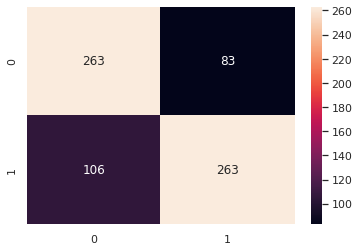

In [ ]:
warnings.filterwarnings(action='ignore') 
df = pd.concat([X_train, y_train], axis=1)
df_test_test = pd.concat([X_test, y_test], axis=1)
features = pso_calculate(len(X_train.columns), df, df_test_test)

## Modelling

In [ ]:
def drop_columns(X):
    i = 0
    X_1 = X.copy()
    for index, value in enumerate(features):
        if value == 0 :
            X_1 = X_1.drop(X_1.columns[i], axis = 1)
        else:
            i = i+1
    return X_1

In [ ]:
len(features)

In [ ]:
df_train.shape

In [ ]:
X_train_copy = X_train.copy()
print(X_train_copy.shape)
display(X_train_copy.head())
print(features)
# DROP
X_train_copy = drop_columns(X_train_copy)

display(X_train_copy.head())
print(X_train_copy.shape)

X_test_copy = X_test.copy()
print(X_test_copy.shape)
X_test_copy = drop_columns(X_test_copy)
print(X_test_copy.shape)

## Testing

In [ ]:
mlp = model.fit(X_train_copy.values, y_train.values)

In [ ]:
plt.subplot(211)
plt.title('Loss curve')
plt.plot(mlp.loss_curve_)
plt.subplot(212)
plt.title('Validation scores')
plt.plot(mlp.validation_scores_)

In [ ]:
prediction = model.predict(X_train_copy.values)
scoreF1 = f1_score(y_train, prediction)
scoreAccuracy = accuracy_score(y_train, prediction)
scorePrecision = precision_score(y_train, prediction)
scoreRecall = recall_score(y_train, prediction)
scoreROC = roc_auc_score(y_train, prediction)

print('Result for training')
print('MLP F1 Score %.2f' % scoreF1)
print('MLP Accuracy Score %.2f' % scoreAccuracy)
print('MLP Precision Score %.2f' % scorePrecision)
print('MLP Recall Score %.2f' % scoreRecall)
print('MLP ROC AUC Score %.2f' % scoreROC)

In [ ]:
prediction = model.predict(X_test_copy.values)
scoreF1 = f1_score(y_test, prediction)
scoreAccuracy = accuracy_score(y_test, prediction)
scorePrecision = precision_score(y_test, prediction)
scoreRecall = recall_score(y_test, prediction)
scoreROC = roc_auc_score(y_test, prediction)

print('Result for testing')
print('MLP F1 Score %.2f' % scoreF1)
print('MLP Accuracy Score %.2f' % scoreAccuracy)
print('MLP Precision Score %.2f' % scorePrecision)
print('MLP Recall Score %.2f' % scoreRecall)
print('MLP ROC AUC Score %.2f' % scoreROC)

In [ ]:
df_hasil = {
    'x': [],
    'accuracy': [],
    'recall' : [],
    'precision' : []
}
i = 0
for curr_data in data_hasil:
    df_hasil['x'].append(i)
    df_hasil['accuracy'].append(curr_data['accuracy'])
    df_hasil['recall'].append(curr_data['recall'])
    df_hasil['precision'].append(curr_data['precision'])
    i = i + 1

In [ ]:
df_hasil.to_csv('df_hasil.csv')

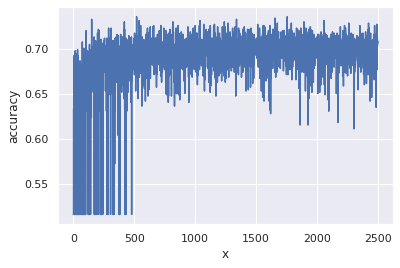

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# # Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="x", y="accuracy", data=df_hasil)

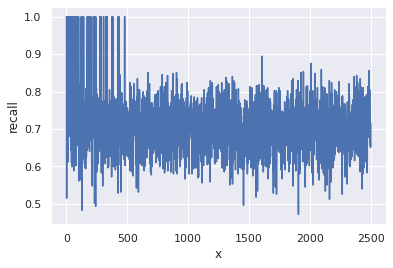

In [ ]:
sns.lineplot(x="x", y="recall", data=df_hasil)

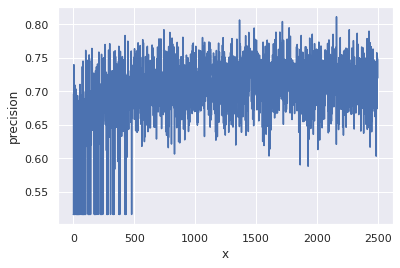

In [ ]:

sns.lineplot(x="x", y="precision", data=df_hasil)